In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/ergasia_tn/1.zip' -d '/content/gdrive/MyDrive/ergasia_tn/'

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00010.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00011.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00012.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00013.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00014.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00015.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00016.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00017.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00018.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00019.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_00053_00020.png  
  inflating: /content/gdrive/MyDrive/ergasia_tn/train/5/00005_000

In [ ]:
#εχουμε 43 κατηγορίες πινακίδων στον πίνακα labels θα αποθηκεύονται οι κατηγορίες
#στον πίνακα data θα αποθηκεύονται οι εικόνες τροποποιημένες σε array και ορίζουμε το rootpath και τα paths που είναι το training και test set
data = []
labels = []
classes = 43
path='/content/gdrive/MyDrive/ergasia_tn/'
train_path='/content/gdrive/MyDrive/ergasia_tn/Train'
test_path='/content/gdrive/MyDrive/ergasia_tn/Test'

In [ ]:
#κανουμε import τις βιβλιοθήκες
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
import tensorflow as tf

#οι φωτογραφίες μας στο training set είναι σε 43 φακέλους-κατηγορίες , στο πρώτο for πάμε στον κάθε φάκελο ξεχωρίστα και στην δεύτερη for κάνουμε προσπέλαση κάθε αρχείο στον φάκελο
#αποθηκεύουμε κάθε εικόνα σε μια τοπική μεταβλητή , την μετατρέπουμε σε 30Χ30 pixel , έγχρωμη και στην συνέχεια την μετατρέπουμε σε πίνακα με την image_to_array.
#επεκτήνουμε τις λίστες label και data
for i in range(43):
  cat = os.path.join(train_path, str(i))
  for j in os.listdir(cat):
    img_path=os.path.join(cat, j)
    image = tf.keras.preprocessing.image.load_img(img_path,target_size=(30,30),color_mode='rgb')
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    data.append(input_arr)
    labels.append(i)            

In [ ]:
#μετατρέπουμε τις λίστες σε arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
#οι εικόνες στο training set είναι 39209 με μέγεθος 30Χ30 και 3 κανάλια rgb 
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
#χωρίζουμε το training set σε 80training και 20% val
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=365)

In [ ]:
#διαιρούμε τις τιμές τους με το 255 για να έχουμε τις τιμές στο [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:

print(X_train.shape)
print(X_test.shape)

(31367, 30, 30, 3)
(7842, 30, 30, 3)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#ελέγχουμε αν έχει γίνει σωστά η διαδικασία της κατηγοριοποίσης σε μια εικόνα και αν έχουμε λάβει όλες τις κατηγορίες
print(y_train[10])
print(np.unique(y_train))

2
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [ ]:
#μετατρέπουμε τις ετικέτες σε one hot διανύσματα 
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
#έχουμε κάνει για αρχή ένα πολύ απλό μοντέλο για δοκιμή αυτό που χρησιμοποιήσαμε και στην τάξη για το cifar
#με 2 συνελλικτικά επίπεδα και 16 και 32 φίλτρα αντίστοιχα και 2 προς 1 maxpooling layers
# στο τέλος χρησιμοποιούμε την flatten για να μετατρέψουμε την έξοδο το συνελλικτικού σε διάνυσμα και χρησιμοποιούμε την softmax για την κατηγοριοποίηση που ουσιαστικά είναι μια logistic για πάνω από 2 κατηγορίες
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Input(shape=X_train[0].shape))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(43, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 43)                67467     
Total params: 72,555
Trainable params: 72,555
Non-trainable params: 0
__________________________________________________

In [ ]:
#εκπαιδεύουμε το μοντέλο με 32 batch_size και 12 εποχές ,χρησιμοποιούμε σαν μετρική το accuracy και το test το βάζουμε για validation
batch_size = 32
epochs = 12

model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(X_test, y_test))

Epoch 1/12
981/981 [==============================] - 25s 25ms/step - loss: 2.0906 - accuracy: 0.4481 - val_loss: 0.4034 - val_accuracy: 0.8919
Epoch 2/12
981/981 [==============================] - 24s 24ms/step - loss: 0.2999 - accuracy: 0.9202 - val_loss: 0.1791 - val_accuracy: 0.9556
Epoch 3/12
981/981 [==============================] - 24s 24ms/step - loss: 0.1339 - accuracy: 0.9647 - val_loss: 0.1443 - val_accuracy: 0.9637
Epoch 4/12
981/981 [==============================] - 24s 24ms/step - loss: 0.0838 - accuracy: 0.9780 - val_loss: 0.1210 - val_accuracy: 0.9698
Epoch 5/12
981/981 [==============================] - 28s 29ms/step - loss: 0.0642 - accuracy: 0.9837 - val_loss: 0.1124 - val_accuracy: 0.9726
Epoch 6/12
981/981 [==============================] - 23s 24ms/step - loss: 0.0397 - accuracy: 0.9894 - val_loss: 0.0873 - val_accuracy: 0.9788
Epoch 7/12
981/981 [==============================] - 23s 24ms/step - loss: 0.0318 - accuracy: 0.9929 - val_loss: 0.1349 - val_accuracy:

In [ ]:
#τέλος διαβάζουμε το csv που έχει τις πραγματικές κατηγορίες των εικόνων του test set
from sklearn.metrics import accuracy_score

y_test = pd.read_csv(path+'Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [ ]:
#ακολουθούμε την ίδια διαδικασία με το training set για την προεπεξεργασία
data=[]

for img in imgs:
  img_path = os.path.join(path+img)
  image = tf.keras.preprocessing.image.load_img(img_path,target_size=(30,30),color_mode='rgb')
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  X_test = 
  data.append(np.array(input_arr))

In [ ]:
X_test=np.array(data)
X_test = X_test.astype('float32') / 255.0

#και κάνουμε την πρόβλεψη με το test set για να δούμε το accuracy του μοντέλου μας που βγαίνει 91,9%

pred = model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print('Test Data Accuracy Score',accuracy_score(labels, pred)*100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test Data Accuracy Score 91.90023752969121


In [ ]:
#12630 οι φωτογε=ραφίες για το τέστινγκ
labels.shape

(12630,)

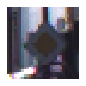

In [ ]:
#δοκιμή για plotting μιας εικόνας
fig = plt.figure(figsize=(1, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.imshow(X_test[10], interpolation="none")

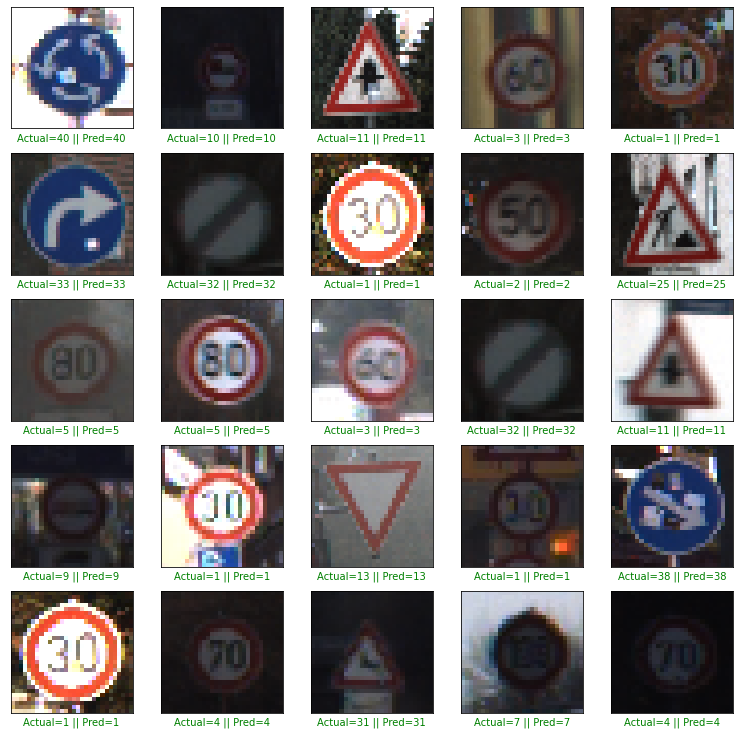

In [ ]:
#τέλος βγάζουμε ένα δείγμα 25 εικόνων και βλέπουμε τις πραγματικές με τις προβλεπόμενες τιμές -έτυχε να είναι όλες σωστές

import random
plt.figure(figsize = (13, 13))

start_index = 0
for j in range(25):
    i=random.randint(0,12630)
    plt.subplot(5, 5, j + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
# θα βελτιώσουμε και άλλο το μοντέλο μας , περιμένουμε για το feedback το δικό σας τι άλλο θα μπορούσαμε να γράψουμε η να βελτιώσουμε. 
#Πάντως όσον αφορά το σημερινό μάθημα για το image_dataset_from_directory που είπατε , δεν ξέρουμε κατά πόσο είναι εφικτό σε εμάς γιατί οι φωτογραφίες είναι σε διαφορερικό directory